<a href="https://colab.research.google.com/github/evangrinalds/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/module2-Train/Copy_of_LS_DS_432_Train_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

In [12]:
from sklearn.model_selection import train_test_split 
import numpy as np
def load_quickdraw10(path):

  data = np.load(path)
  X = data['arr_0']
  y = data['arr_1']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,
                                                      random_state=42)

  return X_train, X_test, y_train, y_test

In [20]:
X_train, X_test, y_train, y_test = load_quickdraw10('sample_data/quickdraw10.npz')

In [22]:
X_train.shape
y_train.shape

(70000,)

### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [28]:
# Imports
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

def create_model(lr=.01, optimizer=SGD):
  
  opt = optimizer(learning_rate=lr)

  model = Sequential(
      [
      Dense(32, activation='sigmoid', input_dim=784),
      Dense(32, activation='sigmoid'), 
      Dense(10, activation='softmax')
      ]
  )

  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  
  return model

### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

Analysis: Higher batch size had better accuracy than lower batch size

In [29]:
batch_32 = create_model()

batch_default = batch_32.fit(X_train, y_train, 
                             epochs=15, 
                             batch_size=32, 
                             validation_data=(X_test, y_test))

Epoch 1/15
2188/2188 [==============================] - 3s 2ms/step - loss: 1.8965 - accuracy: 0.4334 - val_loss: 1.5705 - val_accuracy: 0.5327
Epoch 2/15
2188/2188 [==============================] - 3s 1ms/step - loss: 1.4054 - accuracy: 0.5875 - val_loss: 1.2817 - val_accuracy: 0.6304
Epoch 3/15
2188/2188 [==============================] - 3s 2ms/step - loss: 1.1962 - accuracy: 0.6448 - val_loss: 1.1400 - val_accuracy: 0.6537
Epoch 4/15
2188/2188 [==============================] - 3s 1ms/step - loss: 1.0897 - accuracy: 0.6680 - val_loss: 1.0469 - val_accuracy: 0.6789
Epoch 5/15
2188/2188 [==============================] - 3s 1ms/step - loss: 1.0245 - accuracy: 0.6858 - val_loss: 1.0164 - val_accuracy: 0.6817
Epoch 6/15
2188/2188 [==============================] - 3s 1ms/step - loss: 0.9989 - accuracy: 0.6882 - val_loss: 0.9927 - val_accuracy: 0.6906
Epoch 7/15
2188/2188 [==============================] - 3s 1ms/step - loss: 0.9663 - accuracy: 0.7010 - val_loss: 0.9513 - val_accuracy:

In [30]:
batch_10 = create_model()

batch_10 = batch_10.fit(X_train, y_train,
                              epochs=15,
                              batch_size=10,
                              validation_data=(X_test, y_test))

Epoch 1/15
7000/7000 [==============================] - 9s 1ms/step - loss: 1.6095 - accuracy: 0.5130 - val_loss: 1.2851 - val_accuracy: 0.6167
Epoch 2/15
7000/7000 [==============================] - 9s 1ms/step - loss: 1.1974 - accuracy: 0.6263 - val_loss: 1.1269 - val_accuracy: 0.6520
Epoch 3/15
7000/7000 [==============================] - 9s 1ms/step - loss: 1.1349 - accuracy: 0.6375 - val_loss: 1.1451 - val_accuracy: 0.6278
Epoch 4/15
7000/7000 [==============================] - 9s 1ms/step - loss: 1.1147 - accuracy: 0.6439 - val_loss: 1.0758 - val_accuracy: 0.6609
Epoch 5/15
7000/7000 [==============================] - 9s 1ms/step - loss: 1.0857 - accuracy: 0.6547 - val_loss: 1.1071 - val_accuracy: 0.6356
Epoch 6/15
7000/7000 [==============================] - 9s 1ms/step - loss: 1.0821 - accuracy: 0.6575 - val_loss: 1.0637 - val_accuracy: 0.6724
Epoch 7/15
7000/7000 [==============================] - 9s 1ms/step - loss: 1.0433 - accuracy: 0.6746 - val_loss: 1.0845 - val_accuracy:

In [31]:
batch_6 = create_model().fit(X_train, y_train,
                             epochs=15,
                             batch_size=6,
                             validation_data=(X_test, y_test))

Epoch 1/15
11667/11667 [==============================] - 14s 1ms/step - loss: 1.5368 - accuracy: 0.5177 - val_loss: 1.3254 - val_accuracy: 0.5719
Epoch 2/15
11667/11667 [==============================] - 14s 1ms/step - loss: 1.2727 - accuracy: 0.5739 - val_loss: 1.2162 - val_accuracy: 0.5956
Epoch 3/15
11667/11667 [==============================] - 14s 1ms/step - loss: 1.2175 - accuracy: 0.5915 - val_loss: 1.2038 - val_accuracy: 0.5966
Epoch 4/15
11667/11667 [==============================] - 14s 1ms/step - loss: 1.2283 - accuracy: 0.5934 - val_loss: 1.1750 - val_accuracy: 0.6128
Epoch 5/15
11667/11667 [==============================] - 15s 1ms/step - loss: 1.2033 - accuracy: 0.5959 - val_loss: 1.2126 - val_accuracy: 0.5828
Epoch 6/15
11667/11667 [==============================] - 14s 1ms/step - loss: 1.1881 - accuracy: 0.6073 - val_loss: 1.1979 - val_accuracy: 0.6143
Epoch 7/15
11667/11667 [==============================] - 14s 1ms/step - loss: 1.1676 - accuracy: 0.6160 - val_loss: 1

In [32]:
batch_40 = create_model().fit(X_train, y_train,
                              epochs=15,
                              batch_size=40,
                              validation_data=(X_test, y_test))

Epoch 1/15
1750/1750 [==============================] - 3s 2ms/step - loss: 1.9736 - accuracy: 0.4249 - val_loss: 1.6809 - val_accuracy: 0.5242
Epoch 2/15
1750/1750 [==============================] - 3s 2ms/step - loss: 1.4860 - accuracy: 0.5729 - val_loss: 1.3264 - val_accuracy: 0.6215
Epoch 3/15
1750/1750 [==============================] - 3s 2ms/step - loss: 1.2365 - accuracy: 0.6515 - val_loss: 1.1565 - val_accuracy: 0.6790
Epoch 4/15
1750/1750 [==============================] - 3s 2ms/step - loss: 1.1046 - accuracy: 0.6849 - val_loss: 1.0518 - val_accuracy: 0.6994
Epoch 5/15
1750/1750 [==============================] - 3s 2ms/step - loss: 1.0271 - accuracy: 0.7013 - val_loss: 0.9889 - val_accuracy: 0.7136
Epoch 6/15
1750/1750 [==============================] - 3s 2ms/step - loss: 0.9712 - accuracy: 0.7126 - val_loss: 0.9497 - val_accuracy: 0.7151
Epoch 7/15
1750/1750 [==============================] - 3s 2ms/step - loss: 0.9357 - accuracy: 0.7205 - val_loss: 0.9232 - val_accuracy:

In [33]:
batch_70 = create_model().fit(X_train, y_train,
                              epochs=15,
                              batch_size=70,
                              validation_data=(X_test, y_test))

Epoch 1/15
1000/1000 [==============================] - 2s 2ms/step - loss: 2.0968 - accuracy: 0.3721 - val_loss: 1.8740 - val_accuracy: 0.5124
Epoch 2/15
1000/1000 [==============================] - 2s 2ms/step - loss: 1.7139 - accuracy: 0.5468 - val_loss: 1.5659 - val_accuracy: 0.5807
Epoch 3/15
1000/1000 [==============================] - 2s 2ms/step - loss: 1.4570 - accuracy: 0.6074 - val_loss: 1.3627 - val_accuracy: 0.6307
Epoch 4/15
1000/1000 [==============================] - 2s 2ms/step - loss: 1.2914 - accuracy: 0.6452 - val_loss: 1.2242 - val_accuracy: 0.6639
Epoch 5/15
1000/1000 [==============================] - 2s 2ms/step - loss: 1.1773 - accuracy: 0.6715 - val_loss: 1.1368 - val_accuracy: 0.6840
Epoch 6/15
1000/1000 [==============================] - 2s 2ms/step - loss: 1.0915 - accuracy: 0.6937 - val_loss: 1.0605 - val_accuracy: 0.7014
Epoch 7/15
1000/1000 [==============================] - 2s 2ms/step - loss: 1.0296 - accuracy: 0.7042 - val_loss: 1.0128 - val_accuracy:

In [37]:
import seaborn as sns
import pandas as pd

batch_sizes = []

for exp, result in zip([batch_default, batch_10, batch_6, batch_40, batch_70], ["32_", "10_", "6_", "40_", "70_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Batch Size'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,1.896488,0.433429,1.570498,0.532733,0,32_
1,1.405362,0.587500,1.281669,0.630400,1,32_
2,1.196192,0.644786,1.139951,0.653700,2,32_
3,1.089710,0.667971,1.046904,0.678933,3,32_
4,1.024502,0.685757,1.016401,0.681733,4,32_


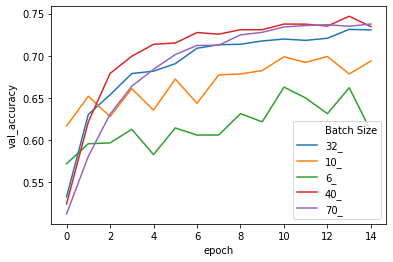

In [38]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df)

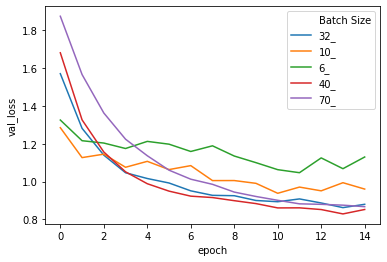

In [39]:
sns.lineplot(x='epoch', y='val_loss', hue='Batch Size', data=df)

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 


*   Analysis = Learning rates seems to have a sweet spot



In [40]:
lr_1 = create_model(lr=1).fit(X_train, y_train, 
                             epochs=15, 
                             batch_size=75, 
                             validation_data=(X_test, y_test))

Epoch 1/15
934/934 [==============================] - 2s 2ms/step - loss: 1.8569 - accuracy: 0.3128 - val_loss: 1.8758 - val_accuracy: 0.2883
Epoch 2/15
934/934 [==============================] - 2s 2ms/step - loss: 1.7407 - accuracy: 0.3448 - val_loss: 1.7281 - val_accuracy: 0.3479
Epoch 3/15
934/934 [==============================] - 2s 2ms/step - loss: 1.6891 - accuracy: 0.3689 - val_loss: 1.6645 - val_accuracy: 0.3763
Epoch 4/15
934/934 [==============================] - 2s 2ms/step - loss: 1.6606 - accuracy: 0.3778 - val_loss: 1.6715 - val_accuracy: 0.4132
Epoch 5/15
934/934 [==============================] - 2s 2ms/step - loss: 1.5173 - accuracy: 0.4708 - val_loss: 1.4773 - val_accuracy: 0.4902
Epoch 6/15
934/934 [==============================] - 2s 2ms/step - loss: 1.4610 - accuracy: 0.4761 - val_loss: 1.4337 - val_accuracy: 0.4798
Epoch 7/15
934/934 [==============================] - 2s 2ms/step - loss: 1.4817 - accuracy: 0.4657 - val_loss: 1.4837 - val_accuracy: 0.4408
Epoch 

In [41]:
lr_onetenth = create_model(lr=.1).fit(X_train, y_train, 
                             epochs=15, 
                             batch_size=75, 
                             validation_data=(X_test, y_test))

Epoch 1/15
934/934 [==============================] - 2s 2ms/step - loss: 1.5538 - accuracy: 0.5095 - val_loss: 1.2960 - val_accuracy: 0.5801
Epoch 2/15
934/934 [==============================] - 2s 2ms/step - loss: 1.2124 - accuracy: 0.6075 - val_loss: 1.1833 - val_accuracy: 0.6242
Epoch 3/15
934/934 [==============================] - 2s 2ms/step - loss: 1.1474 - accuracy: 0.6295 - val_loss: 1.1682 - val_accuracy: 0.6086
Epoch 4/15
934/934 [==============================] - 2s 2ms/step - loss: 1.1454 - accuracy: 0.6217 - val_loss: 1.1812 - val_accuracy: 0.6132
Epoch 5/15
934/934 [==============================] - 2s 2ms/step - loss: 1.1436 - accuracy: 0.6240 - val_loss: 1.1142 - val_accuracy: 0.6463
Epoch 6/15
934/934 [==============================] - 2s 2ms/step - loss: 1.1362 - accuracy: 0.6235 - val_loss: 1.2010 - val_accuracy: 0.5990
Epoch 7/15
934/934 [==============================] - 2s 2ms/step - loss: 1.0636 - accuracy: 0.6526 - val_loss: 1.0454 - val_accuracy: 0.6575
Epoch 

In [42]:
lr_oneonehundreth = create_model(lr=.01).fit(X_train, y_train, 
                                             epochs=15, 
                                             batch_size=75, 
                                             validation_data=(X_test, y_test))

Epoch 1/15
934/934 [==============================] - 2s 2ms/step - loss: 2.1223 - accuracy: 0.3559 - val_loss: 1.9165 - val_accuracy: 0.4829
Epoch 2/15
934/934 [==============================] - 2s 2ms/step - loss: 1.7659 - accuracy: 0.5143 - val_loss: 1.6284 - val_accuracy: 0.5424
Epoch 3/15
934/934 [==============================] - 2s 2ms/step - loss: 1.5225 - accuracy: 0.5712 - val_loss: 1.4248 - val_accuracy: 0.5965
Epoch 4/15
934/934 [==============================] - 2s 2ms/step - loss: 1.3518 - accuracy: 0.6189 - val_loss: 1.2839 - val_accuracy: 0.6419
Epoch 5/15
934/934 [==============================] - 2s 2ms/step - loss: 1.2260 - accuracy: 0.6557 - val_loss: 1.1879 - val_accuracy: 0.6606
Epoch 6/15
934/934 [==============================] - 2s 2ms/step - loss: 1.1435 - accuracy: 0.6752 - val_loss: 1.1094 - val_accuracy: 0.6886
Epoch 7/15
934/934 [==============================] - 2s 2ms/step - loss: 1.0828 - accuracy: 0.6881 - val_loss: 1.0660 - val_accuracy: 0.6936
Epoch 

In [43]:
lr_onethousandth = create_model(lr=.001).fit(X_train, y_train, 
                                             epochs=15, 
                                             batch_size=75, 
                                             validation_data=(X_test, y_test))

Epoch 1/15
934/934 [==============================] - 2s 2ms/step - loss: 2.3622 - accuracy: 0.0963 - val_loss: 2.2751 - val_accuracy: 0.1187
Epoch 2/15
934/934 [==============================] - 2s 2ms/step - loss: 2.2359 - accuracy: 0.1928 - val_loss: 2.2041 - val_accuracy: 0.2614
Epoch 3/15
934/934 [==============================] - 2s 2ms/step - loss: 2.1803 - accuracy: 0.3107 - val_loss: 2.1576 - val_accuracy: 0.3400
Epoch 4/15
934/934 [==============================] - 2s 2ms/step - loss: 2.1376 - accuracy: 0.3623 - val_loss: 2.1178 - val_accuracy: 0.3752
Epoch 5/15
934/934 [==============================] - 2s 2ms/step - loss: 2.0986 - accuracy: 0.3860 - val_loss: 2.0799 - val_accuracy: 0.3954
Epoch 6/15
934/934 [==============================] - 2s 2ms/step - loss: 2.0603 - accuracy: 0.4037 - val_loss: 2.0417 - val_accuracy: 0.4134
Epoch 7/15
934/934 [==============================] - 2s 2ms/step - loss: 2.0232 - accuracy: 0.4170 - val_loss: 2.0055 - val_accuracy: 0.4247
Epoch 

In [44]:
lr_onetenthousandth = create_model(lr=.0001).fit(X_train, y_train, 
                                             epochs=15, 
                                             batch_size=75, 
                                             validation_data=(X_test, y_test))

Epoch 1/15
934/934 [==============================] - 2s 2ms/step - loss: 2.4027 - accuracy: 0.0759 - val_loss: 2.3894 - val_accuracy: 0.0756
Epoch 2/15
934/934 [==============================] - 2s 2ms/step - loss: 2.3823 - accuracy: 0.0764 - val_loss: 2.3713 - val_accuracy: 0.0776
Epoch 3/15
934/934 [==============================] - 2s 2ms/step - loss: 2.3649 - accuracy: 0.0790 - val_loss: 2.3559 - val_accuracy: 0.0815
Epoch 4/15
934/934 [==============================] - 2s 2ms/step - loss: 2.3502 - accuracy: 0.0836 - val_loss: 2.3431 - val_accuracy: 0.0873
Epoch 5/15
934/934 [==============================] - 2s 2ms/step - loss: 2.3378 - accuracy: 0.0892 - val_loss: 2.3317 - val_accuracy: 0.0925
Epoch 6/15
934/934 [==============================] - 2s 2ms/step - loss: 2.3269 - accuracy: 0.0960 - val_loss: 2.3221 - val_accuracy: 0.0973
Epoch 7/15
934/934 [==============================] - 2s 2ms/step - loss: 2.3175 - accuracy: 0.1020 - val_loss: 2.3134 - val_accuracy: 0.1049
Epoch 

In [45]:
import seaborn as sns
import pandas as pd

learning_rates = []

for exp, result in zip([lr_1, lr_onetenth, lr_oneonehundreth, lr_onethousandth, lr_onetenthousandth], ["1.0_", "0.1", "0.01_", "0.001_", "0.0001_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Learning Rate'] = result

  learning_rates.append(df)

df = pd.concat(learning_rates)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate
0,1.856889,0.312771,1.875806,0.288267,0,1.0_
1,1.740698,0.344771,1.728112,0.347933,1,1.0_
2,1.689149,0.368943,1.664493,0.376300,2,1.0_
3,1.660638,0.377814,1.671451,0.413200,3,1.0_
4,1.517261,0.470814,1.477273,0.490167,4,1.0_


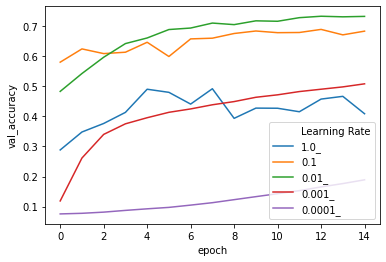

In [46]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df);

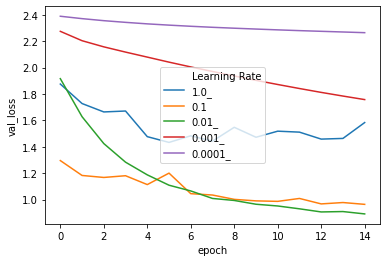

In [47]:
sns.lineplot(x='epoch', y='val_loss', hue='Learning Rate', data=df)

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [48]:
sgd = create_model().fit(X_train, y_train, 
                        epochs=15, 
                        batch_size=75, 
                        validation_data=(X_test, y_test))

Epoch 1/15
934/934 [==============================] - 2s 2ms/step - loss: 2.1379 - accuracy: 0.3619 - val_loss: 1.9579 - val_accuracy: 0.5019
Epoch 2/15
934/934 [==============================] - 2s 2ms/step - loss: 1.7976 - accuracy: 0.5356 - val_loss: 1.6470 - val_accuracy: 0.5633
Epoch 3/15
934/934 [==============================] - 2s 2ms/step - loss: 1.5220 - accuracy: 0.5849 - val_loss: 1.4147 - val_accuracy: 0.6047
Epoch 4/15
934/934 [==============================] - 2s 2ms/step - loss: 1.3356 - accuracy: 0.6171 - val_loss: 1.2740 - val_accuracy: 0.6266
Epoch 5/15
934/934 [==============================] - 2s 2ms/step - loss: 1.2176 - accuracy: 0.6516 - val_loss: 1.1755 - val_accuracy: 0.6632
Epoch 6/15
934/934 [==============================] - 2s 2ms/step - loss: 1.1350 - accuracy: 0.6771 - val_loss: 1.1001 - val_accuracy: 0.6908
Epoch 7/15
934/934 [==============================] - 2s 2ms/step - loss: 1.0725 - accuracy: 0.6952 - val_loss: 1.0562 - val_accuracy: 0.6942
Epoch 

In [49]:
adam = create_model(optimizer=Adam).fit(X_train, y_train, 
                                        epochs=15, 
                                        batch_size=75, 
                                        validation_data=(X_test, y_test))

Epoch 1/15
934/934 [==============================] - 2s 2ms/step - loss: 1.5195 - accuracy: 0.4525 - val_loss: 1.4249 - val_accuracy: 0.4697
Epoch 2/15
934/934 [==============================] - 2s 2ms/step - loss: 1.3716 - accuracy: 0.5100 - val_loss: 1.2870 - val_accuracy: 0.5461
Epoch 3/15
934/934 [==============================] - 2s 2ms/step - loss: 1.3198 - accuracy: 0.5416 - val_loss: 1.3053 - val_accuracy: 0.5231
Epoch 4/15
934/934 [==============================] - 2s 2ms/step - loss: 1.2881 - accuracy: 0.5453 - val_loss: 1.2698 - val_accuracy: 0.5676
Epoch 5/15
934/934 [==============================] - 2s 2ms/step - loss: 1.2679 - accuracy: 0.5595 - val_loss: 1.2724 - val_accuracy: 0.5685
Epoch 6/15
934/934 [==============================] - 2s 2ms/step - loss: 1.2523 - accuracy: 0.5657 - val_loss: 1.2136 - val_accuracy: 0.5845
Epoch 7/15
934/934 [==============================] - 2s 2ms/step - loss: 1.2250 - accuracy: 0.5695 - val_loss: 1.2363 - val_accuracy: 0.5574
Epoch 

In [50]:
from tensorflow.keras.optimizers import Adadelta

adadelta = create_model(optimizer=Adadelta).fit(X_train, y_train, 
                                                epochs=15, 
                                                batch_size=75, 
                                                validation_data=(X_test, y_test))

Epoch 1/15
934/934 [==============================] - 2s 2ms/step - loss: 2.3633 - accuracy: 0.1436 - val_loss: 2.3135 - val_accuracy: 0.1582
Epoch 2/15
934/934 [==============================] - 2s 2ms/step - loss: 2.2829 - accuracy: 0.1820 - val_loss: 2.2553 - val_accuracy: 0.2034
Epoch 3/15
934/934 [==============================] - 2s 2ms/step - loss: 2.2344 - accuracy: 0.2291 - val_loss: 2.2138 - val_accuracy: 0.2461
Epoch 4/15
934/934 [==============================] - 2s 2ms/step - loss: 2.1957 - accuracy: 0.2686 - val_loss: 2.1777 - val_accuracy: 0.2863
Epoch 5/15
934/934 [==============================] - 2s 2ms/step - loss: 2.1605 - accuracy: 0.3082 - val_loss: 2.1427 - val_accuracy: 0.3293
Epoch 6/15
934/934 [==============================] - 2s 2ms/step - loss: 2.1253 - accuracy: 0.3463 - val_loss: 2.1076 - val_accuracy: 0.3652
Epoch 7/15
934/934 [==============================] - 2s 2ms/step - loss: 2.0891 - accuracy: 0.3762 - val_loss: 2.0715 - val_accuracy: 0.3891
Epoch 

In [51]:
from tensorflow.keras.optimizers import Ftrl

ftrl = create_model(optimizer=Ftrl).fit(X_train, y_train, 
                                        epochs=15, 
                                        batch_size=75, 
                                        validation_data=(X_test, y_test))

Epoch 1/15
934/934 [==============================] - 2s 2ms/step - loss: 2.3034 - accuracy: 0.0987 - val_loss: 2.3029 - val_accuracy: 0.1006
Epoch 2/15
934/934 [==============================] - 2s 2ms/step - loss: 2.3029 - accuracy: 0.1003 - val_loss: 2.3031 - val_accuracy: 0.0992
Epoch 3/15
934/934 [==============================] - 2s 2ms/step - loss: 2.3028 - accuracy: 0.1010 - val_loss: 2.3025 - val_accuracy: 0.1006
Epoch 4/15
934/934 [==============================] - 2s 2ms/step - loss: 2.2994 - accuracy: 0.1283 - val_loss: 2.2874 - val_accuracy: 0.0993
Epoch 5/15
934/934 [==============================] - 2s 2ms/step - loss: 2.1890 - accuracy: 0.1836 - val_loss: 2.0518 - val_accuracy: 0.1891
Epoch 6/15
934/934 [==============================] - 2s 2ms/step - loss: 1.9691 - accuracy: 0.2036 - val_loss: 1.9211 - val_accuracy: 0.2141
Epoch 7/15
934/934 [==============================] - 2s 2ms/step - loss: 1.8917 - accuracy: 0.2361 - val_loss: 1.8743 - val_accuracy: 0.2541
Epoch 

In [52]:
from tensorflow.keras.optimizers import RMSprop

rmsprop = create_model(optimizer=RMSprop).fit(X_train, y_train, 
                                          epochs=15, 
                                          batch_size=75, 
                                          validation_data=(X_test, y_test))

Epoch 1/15
934/934 [==============================] - 2s 2ms/step - loss: 1.2859 - accuracy: 0.5572 - val_loss: 1.1147 - val_accuracy: 0.6326
Epoch 2/15
934/934 [==============================] - 2s 2ms/step - loss: 1.0125 - accuracy: 0.6675 - val_loss: 0.9823 - val_accuracy: 0.6887
Epoch 3/15
934/934 [==============================] - 2s 2ms/step - loss: 0.9716 - accuracy: 0.6873 - val_loss: 0.9746 - val_accuracy: 0.6794
Epoch 4/15
934/934 [==============================] - 2s 2ms/step - loss: 0.9458 - accuracy: 0.6947 - val_loss: 0.9470 - val_accuracy: 0.6918
Epoch 5/15
934/934 [==============================] - 2s 2ms/step - loss: 0.9299 - accuracy: 0.7022 - val_loss: 0.9308 - val_accuracy: 0.7076
Epoch 6/15
934/934 [==============================] - 2s 2ms/step - loss: 0.8957 - accuracy: 0.7135 - val_loss: 0.9009 - val_accuracy: 0.7119
Epoch 7/15
934/934 [==============================] - 2s 2ms/step - loss: 0.8858 - accuracy: 0.7196 - val_loss: 0.8763 - val_accuracy: 0.7222
Epoch 

### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 
```
The process of updating the weights and bias of a Neural Network in order to get a batter accuracy rating
```



## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


